In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, optimizers
from sklearn.model_selection import train_test_split
import os
cwd = os.getcwd() #get my path\n"

In [24]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
# to avoid  CUBLAS_STATUS_ALLOC_FAILED error
config = tf.compat.v1.ConfigProto(gpu_options = 
                         tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.7)
# device_count = {'GPU': 1}
)
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(session)

Num GPUs Available:  1


In [2]:
# x_train = np.load(cwd+ "\\dataset\\github\\utk_faces\\x_train.npy" )
# y_train = np.load(cwd+ "\\dataset\\github\\utk_faces\\y_train.npy" )
# x_test = np.load(cwd+ "\\dataset\\github\\utk_faces\\x_test.npy" )
# y_test = np.load(cwd+ "\\dataset\\github\\utk_faces\\y_test.npy" )

In [21]:
X = np.load(cwd + "\\Processed Dataset\\X.pickle", allow_pickle=True)
y = np.load(cwd + "\\Processed Dataset\\y.pickle", allow_pickle=True)

(1400, 1, 1, 136)

In [3]:
# y_train = np.reshape( y_train , ( -1 , 1 , 1 , 68*2 ))
# y_test = np.reshape( y_test , ( -1 , 1 , 1 , 68*2 ))

In [18]:
X1 = X/255
y1 = y/246
y1 = np.reshape(y1, (-1, 136))
y1.shape

(1400, 100, 100, 3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

### My Model v.1

In [4]:
model_layers = [
                
    tf.keras.layers.Conv2D( 1048 , input_shape=( 100 , 100 , 3 ) , kernel_size=( 3 , 3 ) , strides=2 , activation='relu' ),
    tf.keras.layers.Conv2D( 1048 , kernel_size=( 3 , 3 ) , strides=2 , activation='relu' ),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 512 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 512 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 512 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 512 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 256 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 256 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 140 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 140 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 136 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 136 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 136 , kernel_size=( 3 , 3 ) , strides=1 ),

]
model = tf.keras.Sequential( model_layers )
model.compile( loss=tf.keras.losses.mean_squared_error , optimizer=tf.keras.optimizers.Adam( lr=0.0001 ) , metrics=[ 'accuracy' ] )


### My model v.2

In [ ]:
model_layers = [
                
    tf.keras.layers.Conv2D( 32 , input_shape=( 200 , 200 , 1 ) , kernel_size=( 7 , 7 ) , strides=2 , activation='relu' ),
    tf.keras.layers.Conv2D( 32 , kernel_size=( 7 , 7 ) , strides=2 , activation='relu' ),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 64 , kernel_size=( 7 , 7 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 64 , kernel_size=( 7 , 7 ) , strides=1 , activation='relu' ),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 128 , kernel_size=( 7 , 7 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 128 , kernel_size=( 7 , 7 ) , strides=1 , activation='relu' ),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 256 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 256 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 256 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 256 , kernel_size=( 4 , 4 ) , strides=1 , activation='relu' ),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 136 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 136 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 136 , kernel_size=( 3 , 3 ) , strides=1 ),

]

model = tf.keras.Sequential( model_layers )
learning_rate_fn = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate = 0.001,
    decay_steps = 1300,
    end_learning_rate = 0.00001,
    power=1)
model.summary()
model.compile( loss=tf.keras.losses.mean_squared_error , 
              optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_fn) ,
              metrics='mse')
#tf.keras.optimizers.Adam( lr=0.0001 )

### Modified Model

In [ ]:
model_layers = [
                
    layers.Conv2D( filters=32 , input_shape=( 200 , 200 , 1) , kernel_size=(7, 7), padding='same', activation='relu' ),
    layers.MaxPool2D(pool_size=(2, 2)),

    layers.Conv2D( filters=64 , kernel_size=(7, 7) , padding='same', activation='relu' ),
    layers.MaxPool2D(pool_size=(2, 2)),

    layers.Conv2D( filters=128 , kernel_size=(5, 5) , padding='same', activation='relu' ),
    layers.MaxPool2D(pool_size=(2, 2)),

    layers.Conv2D( filters=256 , kernel_size=(3, 3) , padding='same', activation='relu' ),
    layers.MaxPool2D(pool_size=(2, 2)),

    layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(units=1024, activation='relu', use_bias=True),
    # layers.Dropout(0.2),
    layers.Dense(units=136, activation=None, use_bias=True),
]

model = tf.keras.Sequential( model_layers )
# model.summary()
learning_rate_fn = optimizers.schedules.PolynomialDecay(
    initial_learning_rate = 0.0005,
    decay_steps = 6500,
    end_learning_rate = 0.000025,
    power=0.5)

#sgd = optimizers.SGD(lr=0.001, decay=1e-5, momentum=0.9, nesterov=True)

model.compile( loss=tf.keras.losses.mean_squared_error , 
              optimizer=optimizers.Adam(learning_rate=learning_rate_fn) ,
              metrics='mse')
#tf.keras.optimizers.Adam( lr=0.0001 )

In [5]:
model.fit( x_train , y_train , epochs=10 , batch_size=100 , validation_data=( x_test , y_test ) )

Epoch 1/10
14/14 [==============================] - 17s 1s/step - loss: 0.2081 - accuracy: 0.0636 - val_loss: 0.2844 - val_accuracy: 0.0583
Epoch 2/10
14/14 [==============================] - 17s 1s/step - loss: 0.0334 - accuracy: 0.1393 - val_loss: 0.2049 - val_accuracy: 0.0288
Epoch 3/10
14/14 [==============================] - 18s 1s/step - loss: 0.0131 - accuracy: 0.1455 - val_loss: 0.1315 - val_accuracy: 0.0063
Epoch 4/10
14/14 [==============================] - 18s 1s/step - loss: 0.0079 - accuracy: 0.1757 - val_loss: 0.0913 - val_accuracy: 0.0117
Epoch 5/10
14/14 [==============================] - 18s 1s/step - loss: 0.0054 - accuracy: 0.2296 - val_loss: 0.0584 - val_accuracy: 8.3333e-04
Epoch 6/10
14/14 [==============================] - 18s 1s/step - loss: 0.0046 - accuracy: 0.2298 - val_loss: 0.0459 - val_accuracy: 0.0000e+00
Epoch 7/10
14/14 [==============================] - 18s 1s/step - loss: 0.0039 - accuracy: 0.2404 - val_loss: 0.0273 - val_accuracy: 0.0042
Epoch 8/10
1

In [2]:
model = tf.keras.models.load_model(cwd+"\\Final-68-Modified-Model.h5")

In [12]:
import pandas as pd
facial_keypoints = pd.read_csv(cwd+'\\Dataset\\Facial 20k\\Landmarks\\all_landmarks.txt',                               
                               header=None, delim_whitespace=True, skiprows=[20621])

In [14]:
import cv2
path = cwd+'\\Dataset\\Facial 20k\\crop_part2\\'
#path = cwd+'\\Dataset\\Facial 20k\\crop_part2\\'
keypoints = []
filenames = []
training_data = []
count = 0
# get keypoints for each image
for f_name in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,f_name) ,cv2.IMREAD_GRAYSCALE)  # convert to array
    points = facial_keypoints.loc[facial_keypoints[0] == f_name[:-9]]
      
    if points.empty == False:    # if keypoints are not missing 
        # extract keypoints
        keypoints = points.drop([0], axis = 1).to_numpy()
        keypoints = keypoints.reshape(68, 2)
    
        training_data.append([img_array, keypoints]) 
    else:
        count += 1
        
print("missing value: ", count)

missing value:  0


In [15]:
X = []
y = []
for image,keypoints in training_data:
    X.append(image)
    y.append(keypoints)

In [16]:
X = np.array(X).reshape(-1, 200, 200, 1)
X.shape

(5, 200, 200, 1)

In [17]:
y = np.array(y)
y.shape

(5, 68, 2)

In [19]:
X1 = X/255
y1 = y/246

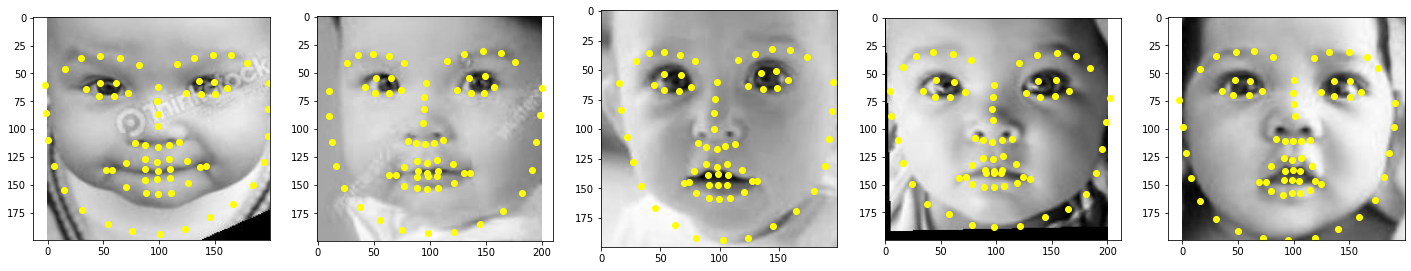

In [24]:
fig = plt.figure(figsize=( 50 , 50 ))
count = 1
for i in range( 0 , 5 ):
    sample_image = np.reshape(X1[i]*255, (200, 200))
    pred = model.predict( X1[ i : i +1  ])*246
    pred = np.reshape( pred[0,] , ( 68 , 2 ) )
    fig.add_subplot( 1 , 10 , count )
    plt.imshow( sample_image , cmap='gray' )
    plt.scatter( pred[ : , 0 ] , pred[ : , 1 ] , c='yellow' )
#     y_t = np.reshape( y1[i], ( 68 , 2 ) )*246
#     plt.scatter( y_t[ : , 0 ] , y_t[ : , 1 ] , c='green' )
    count +=1
plt.show()

In [25]:
X2 = np.load(cwd + "\\Processed Dataset\\X.pickle", allow_pickle=True)
y2 = np.load(cwd + "\\Processed Dataset\\y.pickle", allow_pickle=True)

In [26]:
X2 = X2/255
y2 = y2/246

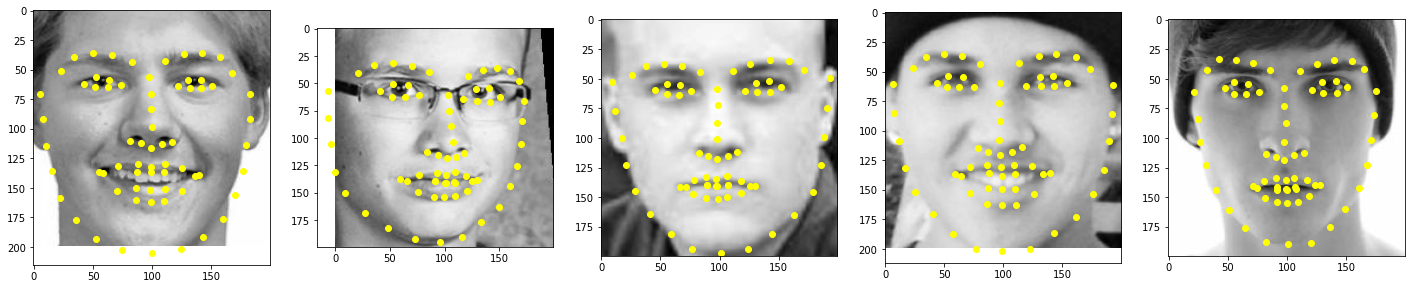

In [28]:
fig = plt.figure(figsize=( 50 , 50 ))
count = 1
for i in range( 0 , 5 ):
    sample_image = np.reshape(X2[i]*255, (200, 200))
    pred = model.predict( X2[ i : i +1  ])*246
    pred = np.reshape( pred[0,] , ( 68 , 2 ) )
    fig.add_subplot( 1 , 10 , count )
    plt.imshow( sample_image , cmap='gray' )
    plt.scatter( pred[ : , 0 ] , pred[ : , 1 ] , c='yellow' )
#     y_t = np.reshape( y1[i], ( 68 , 2 ) )*246
#     plt.scatter( y_t[ : , 0 ] , y_t[ : , 1 ] , c='green' )
    count +=1
plt.show()

In [29]:
model.save("models")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Saved-Model\assets


In [30]:
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model\assets
